# Prediction using Decision Tree Algorithm
To Explore Decision Tree Algorithm. For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Loading the dataset

In [ ]:
from sklearn import datasets
import pandas as pd

# loading the dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#splitting the dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(df,y,test_size=0.2, random_state=21)


# instantiate dt
dt=DecisionTreeClassifier()

# fit dt to training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [3, 4, 5, 6]
    }

# Instantiate a 5-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params_dt,
                       scoring = 'accuracy',
                       cv = 5,
                       n_jobs = -1)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams=grid_dt.best_params_
print("Best hyperparameters:", best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score=grid_dt.best_score_
print("Best CV accuracy:" , best_CV_score)

# Extract best model from 'grid_dt'
best_model=grid_dt.best_estimator_

# Evaluate test set accuracy on the best model
test_acc=best_model.score(X_test, y_test)
print("Test set accuracy of best model:", test_acc)


Best hyperparameters: {'max_depth': 5}
Best CV accuracy: 0.9916666666666668
Test set accuracy of best model: 0.9333333333333333


## Graphical Visualization 

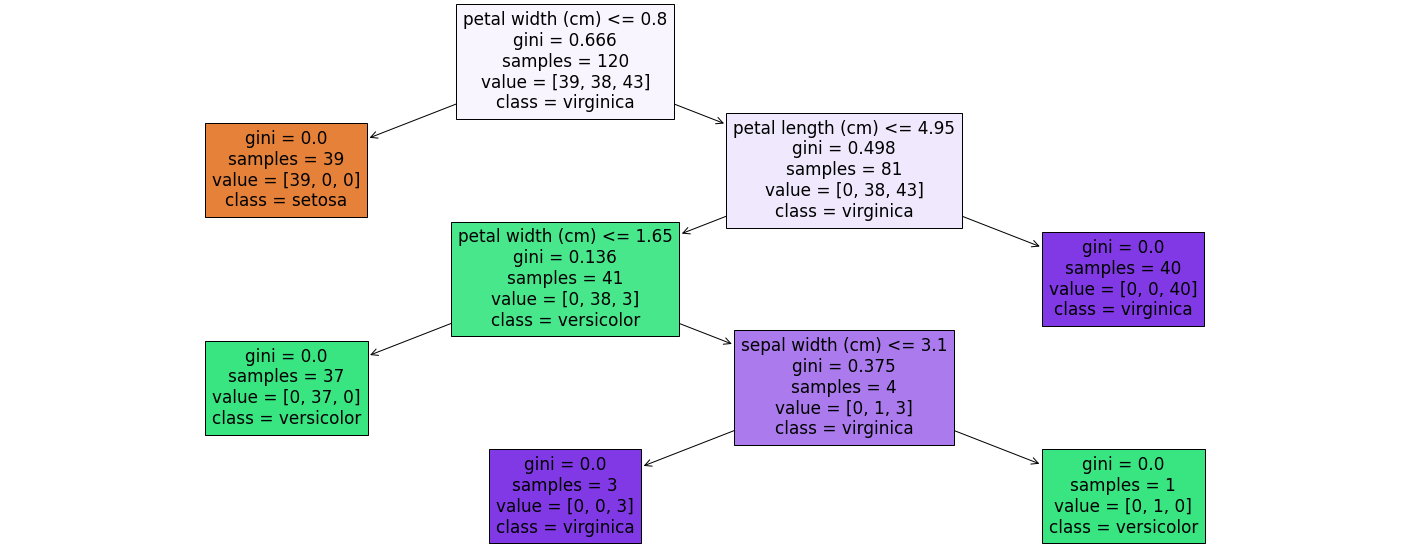

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(best_model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)